In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv('toy_dataset.csv')
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,27.422157,-29.662712,-23.297163,-15.161935,0.345581,3.706750,-5.507209,-46.992476,5.175469,-47.768145,...,7.815960,24.320965,-33.987522,22.306088,31.173511,31.264830,8.380699,-25.843189,36.706408,-43.480792
1,3.489482,-19.153551,-14.636424,14.688258,20.114204,13.532852,34.298084,22.982509,37.938670,-35.648144,...,11.145527,-38.886603,44.579337,37.308519,29.560535,-10.643331,-6.499263,19.921666,-3.528982,31.068739
2,4.293509,22.691579,-1.045155,-8.740350,12.401082,31.362987,-18.831206,-35.384557,8.161430,-16.421762,...,48.190331,-0.503157,-21.740678,15.972237,1.122335,-45.473538,10.518065,-5.818320,-29.466301,-13.676685
3,-2.139348,23.158754,-26.241206,19.426465,9.472049,8.453948,0.637211,-26.675984,-43.823329,11.840874,...,-51.613076,13.278858,-44.179281,32.912282,4.805774,3.960836,-15.888356,61.384773,33.112334,5.088320
4,-35.251034,27.281816,-29.470282,-21.786865,11.806822,58.655133,5.375230,59.740676,-49.007717,-21.801155,...,0.010857,20.975655,-21.358371,18.709369,22.362477,41.214565,-7.217724,31.173870,37.097532,-27.509420


This is a dataset with 1000 features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.

In [11]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0, 999)]
        y = df.columns[randint(0, 999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0, 999)]
        tuples.append((x, y))
        i += 1
    return tuples

In [12]:
pairs = get_pairs()

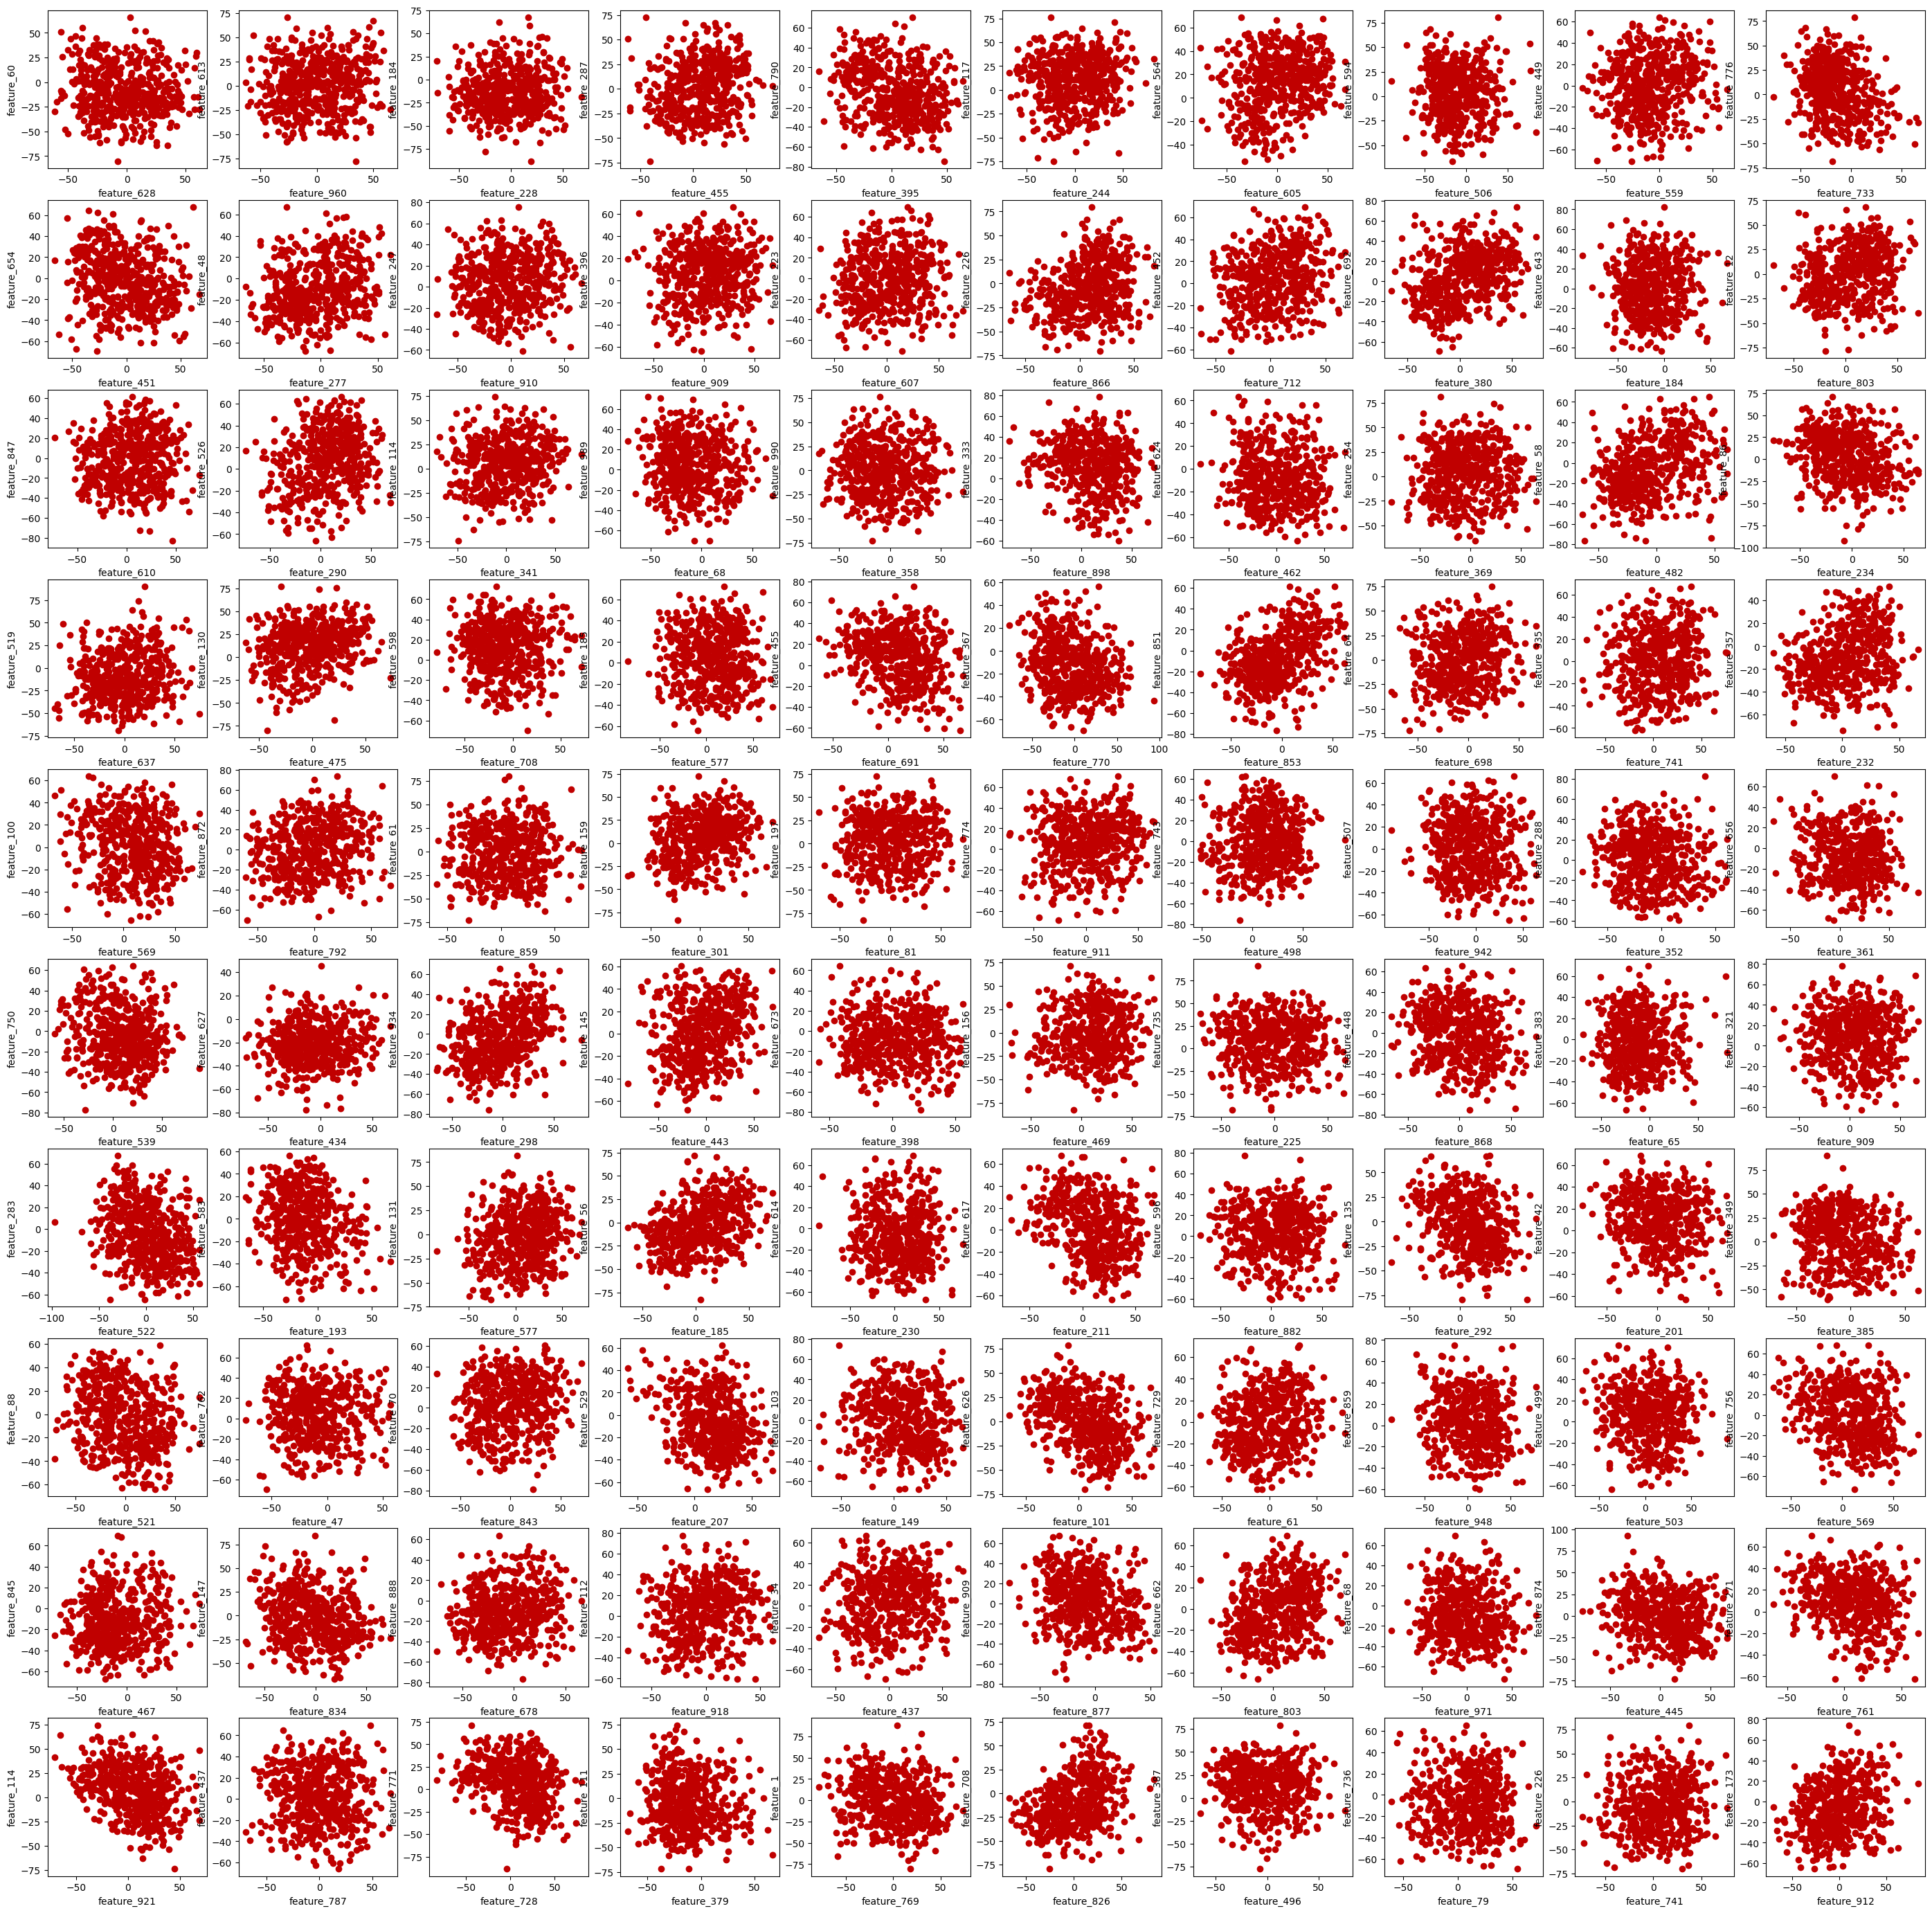

In [13]:
fig, axs = plt.subplots(10, 10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]], df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i += 1

Let's try to see the linear correlation between them

In [14]:
corr = df.corr()

In [15]:
## This will show all the features that have correlation > 0.5 in absolute value. We remove the features 
## with correlation == 1 to remove the correlation of a feature with itself

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

feature_657  feature_81    -0.631294
feature_81   feature_657   -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_547  feature_792    0.620864
feature_965  feature_35     0.631424
feature_35   feature_965    0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

In [16]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1', 'principal_component_2'])

In [17]:
df_pca.head()

,principal_component_1,principal_component_2
0,46.235641,-1.672797
1,210.208758,-84.068249
2,26.352795,-127.895751
3,116.106804,-269.368256
4,110.183605,-279.657306


Text(0.5, 1.0, 'PCA decomposition')

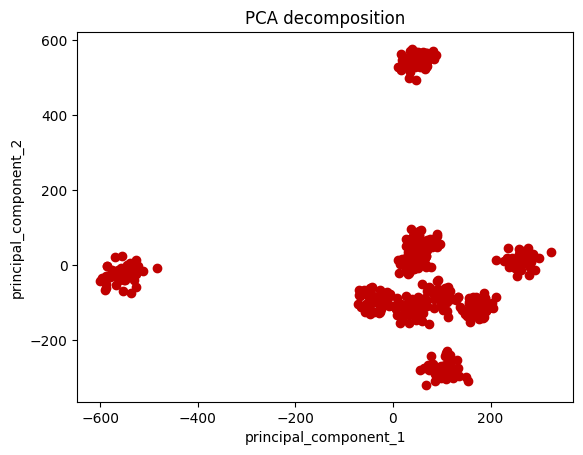

In [18]:
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [20]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
pca.explained_variance_ratio_

array([0.07898605, 0.06674239])

In [21]:
sum(pca.explained_variance_ratio_)

np.float64(0.14572843555106257)

PCA to plot 3 dimensions

In [22]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [23]:
import plotly.express as px

In [24]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [25]:
sum(pca_3.explained_variance_ratio_)

np.float64(0.20806257816093274)